In [56]:
import skvideo.io
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pywt

video = np.array(skvideo.io.vread("Rolling.png"))


rgb_to_YCbCr = np.array([[0.29900, 0.58700, 0.11400],[-0.16874, -0.33126, 0.50000],[0.50000, -0.41869, -0.08131]])

YCbCr_to_rgb = np.linalg.inv(rgb_to_YCbCr)


##converts from RGB To YCbCr 
def rgb2YCbCr(U):
    width = U.shape[0]
    height = U.shape[1]

    YCbCr = np.zeros(U.shape)
    for i in range(width):
        for j in range(height):

            YCbCr[i,j] = np.dot(rgb_to_YCbCr,U[i,j]) + np.array([[0],[128],[128]])[:,0]
    return YCbCr


##converts from YCbCr To RGB
def YCbCr2rgb(U):
    s = U.shape
    Y = np.zeros(s)
    for i in range(s[0]):
        for j in range(s[1]):
            Y[i,j] = np.dot(YCbCr_to_rgb,U[i,j] -  np.array([[0],[128],[128]])[:,0]) 
    return Y


def video_RGB_to_YCbCr(rbgvideo):
    
    frames = rbgvideo.shape[0]

    YCbCr_video = np.zeros(rbgvideo.shape)
    
    
    for k in range(frames):
        YCbCr_video[k,:,:,:]  = rgb2ycbcr(rbgvideo[k,:,:,:])

            
    return YCbCr_video

def video_YCbCr_to_RGB(YCbCr_video):
    
    frames = YCbCr_video.shape[0]

    rgb_video = np.zeros(YCbCr_video.shape)
    
    
    for k in range(frames):
        rgb_video[k,:,:,:]  = ycbcr2rgb(YCbCr_video[k,:,:,:])

            
    return rgb_video.astype(np.uint8)


(13, 42, 52, 3)


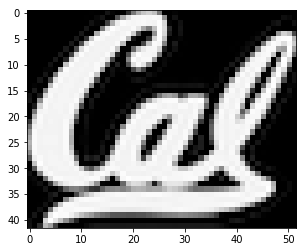

In [62]:
preproc = video_RGB_to_YCbCr(video)
plt.imshow(preproc[0,:,:,0],cmap="gray")
print(preproc.shape)

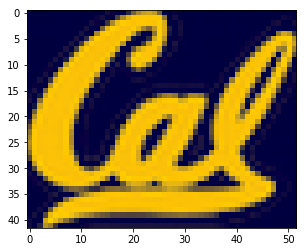

In [58]:
recovery = video_YCbCr_to_RGB(preproc)
plt.imshow(recovery[0,:,:,:])

In [87]:
coeffs = pywt.dwt2(preproc[0,:,:,0], 'db1')
cA, (cH, cV, cD) = coeffs

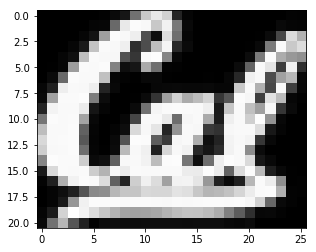

In [88]:
plt.imshow(cA,cmap="gray")

In [108]:
def quantize(data,factor):
    return np.sign(data)*(abs(data)//factor)

def scalar_dequantizer(coeffs, step_size, delta=0.5):
    # delta: a user-selectable parameter. 0 <= delta < 1.
    return np.sign(coeffs)*(abs(coeffs) + delta)*step_size


def thresh_dwt(dwt, f):
    # f: the fraction f largest wavelet coeffs (to save)
    # parts borrowed from hw9
    m = np.sort(abs(dwt.ravel()))[::-1]
    idx = int(len(m) * f) # the fraction f largest wavelet coeff.
    thr = m[idx] # threshhold
    return dwt * (abs(dwt) > thr)


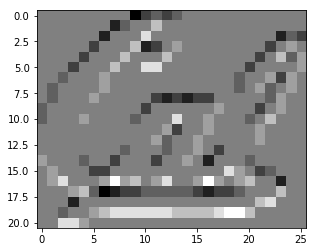

In [113]:
plt.imshow(quantize(cH,2**5),cmap="gray")